In [1]:
# import typical libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# import data
eclipse_annular_2023 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-04-09/eclipse_annular_2023.csv')
eclipse_total_2024 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-04-09/eclipse_total_2024.csv')
eclipse_partial_2023 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-04-09/eclipse_partial_2023.csv')
eclipse_partial_2024 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-04-09/eclipse_partial_2024.csv')

A summary of the data with variables, classes, and description is provided at https://github.com/rfordatascience/tidytuesday/tree/master/data/2024/2024-04-09.

In [3]:
#look at data
eclipse_annular_2023.head()

,state,name,lat,lon,eclipse_1,eclipse_2,eclipse_3,eclipse_4,eclipse_5,eclipse_6
0,AZ,Chilchinbito,36.492002,-110.049213,15:10:50,15:56:20,16:30:29,16:33:31,17:09:40,18:02:10
1,AZ,Chinle,36.151148,-109.578682,15:11:10,15:56:50,16:31:21,16:34:06,17:10:30,18:03:20
2,AZ,Del Muerto,36.187393,-109.435935,15:11:20,15:57:00,16:31:13,16:34:31,17:10:40,18:03:30
3,AZ,Dennehotso,36.828998,-109.875694,15:10:50,15:56:20,16:29:50,16:34:07,17:09:40,18:02:00
4,AZ,Fort Defiance,35.747502,-109.068018,15:11:40,15:57:40,16:32:28,16:34:35,17:11:30,18:04:30


In [4]:
eclipse_total_2024.head()

,state,name,lat,lon,eclipse_1,eclipse_2,eclipse_3,eclipse_4,eclipse_5,eclipse_6
0,AR,Acorn,34.638786,-94.200112,17:30:40,18:15:50,18:47:35,18:51:37,19:23:40,20:08:30
1,AR,Adona,35.039930,-92.899132,17:33:20,18:18:30,18:50:08,18:54:22,19:26:10,20:10:50
2,AR,Alexander,34.618588,-92.451217,17:33:20,18:18:30,18:51:09,18:53:38,19:26:20,20:11:10
3,AR,Alicia,35.892907,-91.083450,17:37:30,18:22:40,18:54:29,18:58:05,19:29:50,20:14:10
4,AR,Alix,35.422002,-93.728784,17:32:50,18:17:50,18:49:54,18:53:00,19:25:20,20:10:00


In [5]:
eclipse_annular_2023.isnull().sum()

state        0
name         0
lat          0
lon          0
eclipse_1    0
eclipse_2    0
eclipse_3    0
eclipse_4    0
eclipse_5    0
eclipse_6    0
dtype: int64

In [6]:
eclipse_total_2024.isnull().sum()

state        0
name         0
lat          0
lon          0
eclipse_1    0
eclipse_2    0
eclipse_3    0
eclipse_4    0
eclipse_5    0
eclipse_6    0
dtype: int64

In [7]:
eclipse_annular_2023.describe()
# times wouldn't be included, duh

,lat,lon
count,811.000000,811.000000
mean,35.406712,-108.047326
std,4.960222,8.266626
min,27.218988,-124.453177
25%,31.303669,-111.984958
50%,35.423455,-106.695710
75%,38.420209,-101.356993
max,44.873179,-96.716722


In [8]:
eclipse_total_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330 entries, 0 to 3329
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      3330 non-null   object 
 1   name       3330 non-null   object 
 2   lat        3330 non-null   float64
 3   lon        3330 non-null   float64
 4   eclipse_1  3330 non-null   object 
 5   eclipse_2  3330 non-null   object 
 6   eclipse_3  3330 non-null   object 
 7   eclipse_4  3330 non-null   object 
 8   eclipse_5  3330 non-null   object 
 9   eclipse_6  3330 non-null   object 
dtypes: float64(2), object(8)
memory usage: 260.3+ KB


In [9]:
eclipse_annular_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      811 non-null    object 
 1   name       811 non-null    object 
 2   lat        811 non-null    float64
 3   lon        811 non-null    float64
 4   eclipse_1  811 non-null    object 
 5   eclipse_2  811 non-null    object 
 6   eclipse_3  811 non-null    object 
 7   eclipse_4  811 non-null    object 
 8   eclipse_5  811 non-null    object 
 9   eclipse_6  811 non-null    object 
dtypes: float64(2), object(8)
memory usage: 63.5+ KB


In [ ]:
eclipse_annular_2023.dtypes
# if we need to do any math with the times, we may need to convert them to something like datetime?

In [ ]:
eclipse_total_2024.dtypes

The suggested questions are: "Which places are in both the 2023 path of annularity and the 2024 path of totality?" and "Which place has the longest duration of totality in 2024?"

To answer the first question, we can look at a scatter plot of the latitude and longitude of `eclipse_annular_2023` and `eclipse_total_2024` and see if there are any intersections.  Based on those results, we can look at the datasets and pull out any duplicate values between the two.

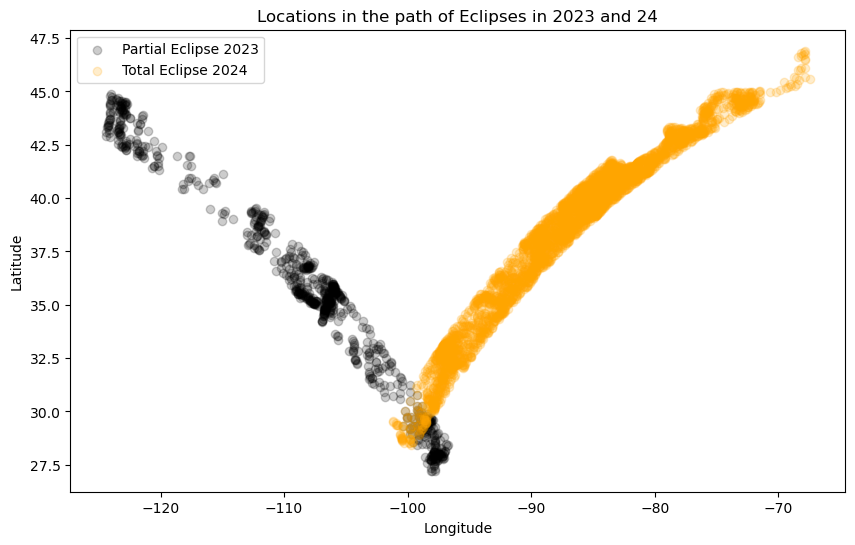

In [10]:
plt.figure(figsize=(10, 6))

# Plot eclipse_partial_2023
plt.scatter(eclipse_annular_2023['lon'], eclipse_annular_2023['lat'], color='black', label='Partial Eclipse 2023', alpha=0.2)

# Plot eclipse_total_2024
plt.scatter(eclipse_total_2024['lon'], eclipse_total_2024['lat'], color='orange', label='Total Eclipse 2024', alpha=0.2)

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations in the path of Eclipses in 2023 and 24')
plt.legend()

# Show the plot
plt.show()

There are definitely some overlaps. Let's see if we can find the locations.

In [11]:
both_paths = pd.merge(eclipse_annular_2023, eclipse_total_2024, on=['state', 'name'])

In [12]:
both_paths

,state,name,lat_x,lon_x,eclipse_1_x,eclipse_2_x,eclipse_3_x,eclipse_4_x,eclipse_5_x,eclipse_6_x,lat_y,lon_y,eclipse_1_y,eclipse_2_y,eclipse_3_y,eclipse_4_y,eclipse_5_y,eclipse_6_y
0,TX,Balcones Heights,29.490225,-98.549138,15:24:00,16:14:30,16:52:03,16:56:07,17:35:30,18:32:40,29.490225,-98.549138,17:14:50,18:00:00,18:33:44,18:34:46,19:09:10,19:55:40
1,TX,Bandera,29.725126,-99.074261,15:23:20,16:13:40,16:50:40,16:55:15,17:34:10,18:31:20,29.725126,-99.074261,17:14:30,17:59:30,18:31:49,18:35:56,19:08:40,19:55:10
2,TX,Barksdale,29.732902,-100.032828,15:22:20,16:12:20,16:49:17,16:53:42,17:32:30,18:29:30,29.732902,-100.032828,17:13:10,17:58:00,18:30:12,18:34:25,19:07:00,19:53:30
3,TX,Batesville,28.952424,-99.629311,15:23:20,16:13:40,16:51:30,16:54:47,17:34:20,18:31:40,28.952424,-99.629311,17:12:10,17:57:10,18:29:50,18:33:24,19:06:30,19:53:10
4,TX,Big Wells,28.569882,-99.570178,15:23:40,16:14:20,16:53:10,16:54:30,17:35:00,18:32:30,28.569882,-99.570178,17:11:40,17:56:40,18:30:16,18:31:35,19:06:00,19:52:40
5,TX,Boerne,29.784938,-98.727949,15:23:30,16:14:00,16:51:35,16:55:14,17:34:50,18:31:50,29.784938,-98.727949,17:15:00,18:00:10,18:32:48,18:36:21,19:09:20,19:55:50
6,TX,Brackettville,29.318201,-100.410503,15:22:20,16:12:20,16:51:12,16:51:26,17:32:30,18:29:30,29.318201,-100.410503,17:11:50,17:56:40,18:28:49,18:33:06,19:05:50,19:52:20
7,TX,Bulverde,29.774485,-98.434959,15:23:50,16:14:30,16:52:33,16:55:12,17:35:20,18:32:30,29.774485,-98.434959,17:15:30,18:00:40,18:33:43,18:36:20,19:09:50,19:56:20
8,TX,Camp Wood,29.669047,-100.010865,15:22:20,16:12:30,16:49:25,16:53:46,17:32:40,18:29:40,29.669047,-100.010865,17:13:10,17:58:00,18:30:05,18:34:23,19:07:00,19:53:30
9,TX,Castle Hills,29.524727,-98.519054,15:24:00,16:14:40,16:52:09,16:56:02,17:35:30,18:32:40,29.524727,-98.519054,17:14:50,18:00:10,18:33:47,18:34:57,19:09:20,19:55:50


In [14]:
both_paths.state.unique()

array(['TX'], dtype=object)

In [13]:
both_paths.name.unique()

array(['Balcones Heights', 'Bandera', 'Barksdale', 'Batesville',
       'Big Wells', 'Boerne', 'Brackettville', 'Bulverde', 'Camp Wood',
       'Castle Hills', 'Castroville', 'Center Point', 'Comfort',
       'Cross Mountain', 'Devine', "D'Hanis", 'Fair Oaks Ranch',
       'Fredericksburg', 'Grey Forest', 'Harper', 'Helotes',
       'Hill Country Village', 'Hollywood Park', 'Hondo', 'Ingram',
       'Junction', 'Kerrville', 'Knippa', 'Lackland', 'LaCoste',
       'Lakehills', 'Lake Medina Shores', 'Lakeside', 'La Pryor',
       'Leakey', 'Leon Valley', 'Lytle', 'Macdona', 'Mason', 'Moore',
       'Natalia', 'North Pearsall', 'Olmos Park', 'Pearsall',
       'Rocksprings', 'Sabinal', 'St. Paul', 'San Antonio', 'Scenic Oaks',
       'Shavano Park', 'Spring Branch', 'Timberwood Park', 'Utopia',
       'Uvalde', 'Uvalde Estates', 'Yancey'], dtype=object)

The locations that were in both paths were all in Texas.

When I'm better at QGIS, I can make this a map!